# Classification of bacteria among ten species using different supervised learning models

Erasmus Students from Institut National des Sciences Appliquées de Toulouse, France : **Quentin DOUARRE , Hennrick Morgan PELLOUX**

The idea of this project comes from the article "Analysis of Identification Method for Bacterial Species and Antibiotic Resistance Genes Using Optical Data From DNA Oligomers" published in the journal Frontiers in Microbiology, in 2020.

The article is available at the following address : [Analysis of Identification Method for Bacterial Species and Antibiotic Resistance Genes Using Optical Data From DNA Oligomers](https://www.frontiersin.org/articles/10.3389/fmicb.2020.00257/full)

The dataset that we have used is available at the following address : [Bacteria Dataset](https://www.kaggle.com/competitions/tabular-playground-series-feb-2022/data)

In the medical field in order to properly diagnose and treat a patient, identifying an infectious agent is essential to properly treat the case. 
Identifying bacterias used to be done by comparing found DNA segments to ones that are known, and this was done by humans which unfortunately could lead to some error and could take some time. Thus taking advantage of the power offered by supervised Machine Learning can be a great opportunity to ease the medical staff's charge of works and treat patients more effectively and at a better rate. However, being in the medical field means that human lives could potentially be at stakes and that is not a matter to take lightly. The accuracy and the reliability of the results must then be as high as possible to minimize errors and potential heavy consequences.

In our case, we want to classify bacteria in different categories using multiple features and as stated before, since this is a critical use, explainability and interpretability should be taken into account in order to provide results that are exploitable and understandable by medical professionnals. We also must have the highest possible accuracy of results with both very low rates of false positives and false negatives in order to not miss classify a bacteria, which could lead to misstreatment of a patient.

Since multiple approaches are available to us, we chose to explore 3 different Machine Learning algorithms with each their own advantages and drawbacks : **KNN**, **Random Forest** and **Neural Networks**. After training and analysing their results and characteristics we will compare them and chose the one that best fits this problem regarding what's at stake.

# OUTLINE

- ## Libraries import

- ## Preprocessing
1. Removal of the incomplete data and rebranding of the data
2. Separating the input and the output
3. Splitting the dataset
4. Normalization of the dataset
5. The different models

- ## KNN
1. Explanation of the principle behind this model
2. Bias and Variance : impact of each parameter
3. Hyper parameter tuning from scratch
4. Automatic hyper parameter tuning with GridSearchCV 
5. Validation curves : analysis of the underfitting/overfitting 

- ## Random Forest
1. Explanation of the principle behind this model
2. Validation curves : analysis of the underfitting/overfitting
3. Discussion about Gini index and Entropy for feature selection
4. Automatic hyperparameter tuning 

- ## Neural Network
1. Explanation of the principle behind this model 
2. Discussion about the architecture 
3. Validation curve : analysis underfitting/overfitting
4. Automatic hyper parameter tuning with GridSearchCV

- ## Result comparison
1. Confusion Matrices 
2. Precision and Accuracy 
3. Complexity of each model and time computation 

- ## Interpretability discussion
1. Medical context and importance of stakes concerning interpretability of ML models
2. Complexity and score tradeoff 
3. Interpretability of each model (underlign features selection, especially on the random forest model)
4. Conclusion 

- ##  Challenge : detection of turberculose and aerogenese

<span style="color:red">**We haven't K. aerogenes and M. tuberculosis in the available dataset** </span>
Note : see Fig 6.



# Libraries import

In [1]:
# Machine Learning Importation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions

# Models importation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Importation of the dataset
data = pd.read_csv ('bacteria.csv')

# Preprocessing

### 1. Removal of the incomplete data and rebranding of the data

In [3]:
# delete all incomplete data
data.dropna(axis=0, inplace=True)

# delete all duplicates
data.drop_duplicates(inplace=True)

# replacement of all bacteria names with numbers
data['target'].replace(['Streptococcus_pyogenes',
                        'Salmonella_enterica',
                        'Enterococcus_hirae',
                        'Streptococcus_pneumoniae',
                        'Staphylococcus_aureus',
                        'Klebsiella_pneumoniae',
                        'Bacteroides_fragilis',
                        'Escherichia_coli',
                        'Campylobacter_jejuni',
                        'Escherichia_fergusonii'],
                      [0,1,2,3,4,5,6,7,8,9], inplace=True)

# print first data
data.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,0
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,1
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,1
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,1
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,2


### 2. Separating the input and the output

In [4]:
# remove the first and the last column
X = data.drop(['target', 'row_id'], axis=1)

# extraction of the last column
y = data['target']

### 3. Splitting the dataset

In [5]:
# Split dataset into two parts: training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Split training set into two parts: training set and validation set
X_train_splitted, X_val, y_train_splitted, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

### 4. Normalization of the dataset

**Z-score normalization** :

We normalize the data by scaling it to unit variance by using the formula : $z=$ $\frac{(x - u)}{s}$

Where $u$ is the mean of training sample and $s$ is the standard deviation of the training samples.

In [6]:
# Scale X_train, X_val, X_test using Z-score normalization
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_splitted_scaled = sc.fit_transform(X_train_splitted)
X_val_scaled = sc.fit_transform(X_val)
X_test_scaled = sc.fit_transform(X_test)

### 5. Analysis of the dataset

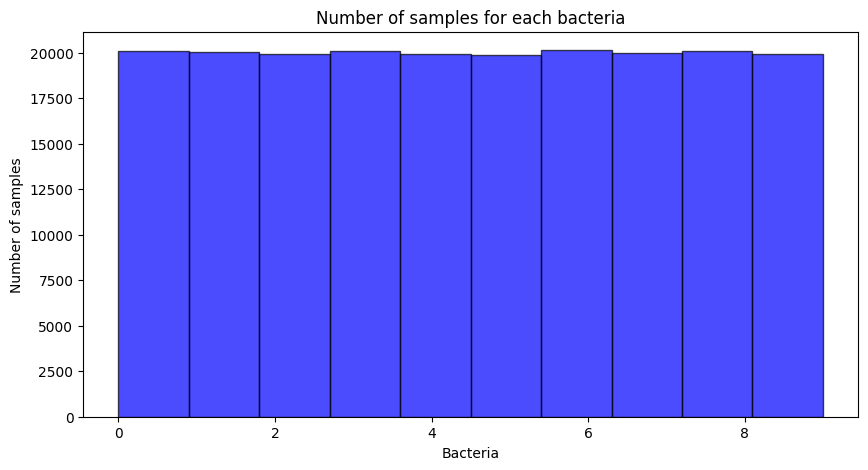

In [7]:
# plot for each bacteria the number of samples
plt.figure(figsize=(10,5))
plt.hist(y, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Number of samples for each bacteria')
plt.xlabel('Bacteria')
plt.ylabel('Number of samples')
plt.show()

In [8]:
# display the number of samples in X
print('Number of samples in X: ', len(X))

# display the number of samples in X_train
print('Number of samples in X_train: ', len(X_train))

# display the number of samples in X_val
print('Number of samples in X_val (associated with X_train_splitted): ', len(X_val))

# display the number of samples in X_test
print('Number of samples in X_test: ', len(X_test))

# display the number of features in X
print('Number of features in X: ', len(X.columns))

Number of samples in X:  200000
Number of samples in X_train:  160000
Number of samples in X_val (associated with X_train_splitted):  32000
Number of samples in X_test:  40000
Number of features in X:  286


NB : We have a dataset with 200000 samples. It is correct but it is not a huge dataset. Concerning the number of features, we have 286 different genomic sequences. This number increases the computation time for the models, especially for complex models and it may be one of the reasons for the overfitting. For our complex models, we will try to reduce it to analyse the variation of accuracy and computation time.

### 6. The different models

We have chosen for this project to analyse three different models, KNN, Random Forest and Neural Network because they are really different on several important points in machine learning. Some are more interpretable than the others, others are more complex. At the end of our project, we have analysed deeply the complexity and interpretability of each model and we have compared between them.

In [9]:
# Adding the models to be tested
models_list = []
models_list.append(KNeighborsClassifier())
models_list.append(DecisionTreeClassifier())
models_list.append(RandomForestClassifier())
models_list.append(MLPClassifier(random_state=42, max_iter=2000))

In [10]:
import time

score_list_train = []
score_list_val = []
execution_time = []
models_tested = ['KNN', 
                 'Decision Tree', 
                 'Random Forest',
                 'MLP'
                 ]

for model in models_list:

    # start computing time
    st = time.time()

    # training
    model.fit(X_train_splitted_scaled, y_train_splitted) 
    et = time.time()

    # compute the execution time
    elapsed_time = et - st

    score_list_train.append(model.score(X_train_splitted_scaled, y_train_splitted))
    score_list_val.append(model.score(X_val_scaled, y_val))
    execution_time.append(elapsed_time)
    

In [11]:
result = pd.DataFrame({'Model':models_tested, 'Train score':score_list_train, 
                       'Test score':score_list_val, 'Execution Time':execution_time})

# print the result
result

,Model,Train score,Test score,Execution Time
0,KNN,0.972703,0.952438,0.224996
1,Decision Tree,1.000000,0.950969,20.069002
2,Random Forest,1.000000,0.991094,69.559999
3,MLP,0.998859,0.985563,129.765932


For now, we can see that the best model for classifying correctly bacteria among ten species is the random forest in terms of score. However, the others have excellent score. Each model has its own characteristics. We have to analyse more in detail the specificities of each of them in the next parts to give a better answer to solve the problem.

# **KNN**

### 1. Explanation of the principle behind this model 

The **KNN** describes the K-Nearest Neighbors algorithm and is a **supervised machine learning classification algorithm**.
To classify new data, its distance to the features of the classified data is computed and it is put in the **predominant class** (class with the most selected neighbors) in the K nearest neighbors.
Depending on the type of weighting, the predominant class can be the class that accumulates the most neighbors or the class with the most and closest neighbors.

It is considered a relatively simple and lightweight Machine Learning model in terms of complexity.

<img src="https://github.com/Quintus618/Classification-of-bacteria-among-ten-species-using-supervised-learning-techniques/blob/main/images/knn.png?raw=1" alt="KNN algorithm explanation" width="800"/>\
*https://www.ibm.com/it-it/topics/knn*

We use 2 ways to evaluate the distance :
- **Manhattan distance** or L1 : $\sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$
- **Euclidian distance** or L2 : $\sum_{i=1}^{n} |x_i - y_i|$

In this type of model, the most impacting parameter is **K** : the number of neighbors to consider.

### 2. Bias and Variance : impact of each parameter

The K number of neighbors greatly impacts both **Bias** and **Variance**. In theory, when K has a small value, the Variance is high *(overfitting)* and when K has a large value the Bias is high *(underfitting)*.
Thus, both Bias and Variance cannot be low and the the value of K must be selected to find a good trade-off between the Bias and the Variance.

### 3. Hyper parameter tuning from scratch

As we have ten different bacteria species, we have not to choose a K number multiple of the class number to avoid indetermination for the output of the model. So, we have to parameterize K as an odd number.

In [14]:
n_neighbors = [1,3,5,7] # number k of neighbors 
weights = ['uniform', 'distance'] # weight function used in prediction
p = [1,2] 

score_list_train_all = []
score_list_val_all = [] 
execution_time_all = []
n_neighbors_all = []
weights_all = []
p_all = []

# Hyperparameter tuning for KNN from scratch
for n in n_neighbors:
    for w in weights:
        for pp in p:
            st = time.time()
            model = KNeighborsClassifier(n_neighbors=n, weights=w, p=pp)
            model.fit(X_train_splitted_scaled, y_train_splitted)
            et = time.time()
            elapsed_time = et - st
            score_list_train_all.append(model.score(X_train_splitted_scaled, y_train_splitted))
            score_list_val_all.append(model.score(X_val_scaled, y_val)) 3+2.983.
            execution_time_all.append(elapsed_time)
            n_neighbors_all.append(n)
            weights_all.append(w)
            p_all.append(pp)
            result_all = pd.DataFrame({'Model':'KKN', 'Train score':score_list_train_all,
                                   'Test score':score_list_val_all, 'Execution Time':execution_time_all, 'n_neighbors':n_neighbors_all, 'weights':weights_all, 'p': p_all})
print(result_all)

   Model  Train score  Test score  Execution Time  n_neighbors   weights  p
0    KKN     1.000000    0.989375        0.215999            1   uniform  1
1    KKN     1.000000    0.987156        0.217000            1   uniform  2
2    KKN     1.000000    0.989375        0.217999            1  distance  1
3    KKN     1.000000    0.987156        0.218001            1  distance  2
4    KKN     0.989766    0.969781        0.219000            3   uniform  1
5    KKN     0.988344    0.966500        0.208001            3   uniform  2
6    KKN     1.000000    0.988187        0.208000            3  distance  1
7    KKN     1.000000    0.986125        0.214001            3  distance  2
8    KKN     0.976227    0.956750        0.217000            5   uniform  1
9    KKN     0.972703    0.952438        0.208994            5   uniform  2
10   KKN     1.000000    0.987500        0.206999            5  distance  1
11   KKN     1.000000    0.985250        0.215999            5  distance  2
12   KKN    

### 4. Automatic hyper parameter tuning with GridSearchCV 

In [15]:
# Automatic hyperparameter tuning for KNN
param_grid_KNN = {'n_neighbors' : [1,3,5,7],
              'weights' : ['uniform', 'distance'],
              'p' : [1, 2] # p=1 : manhattan_distance, p=2 : euclidean_distance
              }

grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, cv=5) # 5-fold cross validation
grid_KNN.fit(X_train_scaled, y_train)

print("Best score:", grid_KNN.best_score_)
print("Param:", grid_KNN.best_params_)



Best score: 0.988025
Param: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [16]:
# Train the best model for KNN
best_KNN_model = KNeighborsClassifier(n_neighbors=grid_KNN.best_params_['n_neighbors'], weights=grid_KNN.best_params_['weights'], p=grid_KNN.best_params_['p'])
best_KNN_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

### 5. Validation curves : analysis of the underfitting/overfitting 

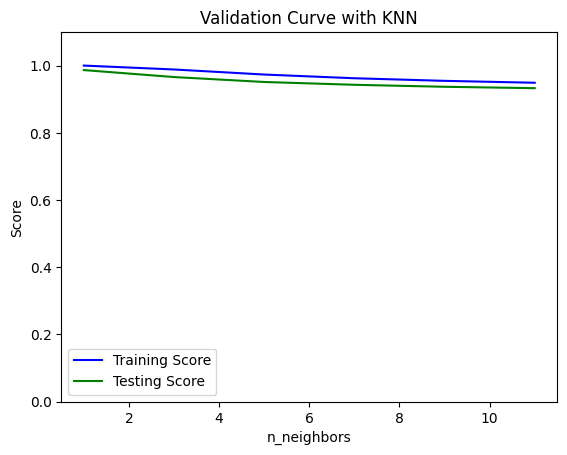

In [17]:
# Validation curve for KNN on n_neighbors: number K of neighbors 

param_K_range = [1,3,5,7,9,11]
train_scores_KNN, test_scores_KNN = validation_curve(KNeighborsClassifier(), X_train_scaled, y_train, param_name="n_neighbors", param_range=param_K_range, cv=5) # 5-fold cross validation

train_scores_mean_KNN = np.mean(train_scores_KNN, axis=1) # mean of the training scores
train_scores_std_KNN = np.std(train_scores_KNN, axis=1) # standard deviation of the training scores
test_scores_mean_KNN = np.mean(test_scores_KNN, axis=1) # mean of the test scores
test_scores_std_KNN = np.std(test_scores_KNN, axis=1) # standard deviation of the test scores

plt.plot(param_K_range, train_scores_mean_KNN,
     label = "Training Score", color = 'b')
plt.plot(param_K_range, test_scores_mean_KNN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()


We can see on the **Validation curve** of the KNN that we have the best score with the lowest value of K, being 1. As explained earlier, with a high value of K the **Bias** increases, which explains the decrease in the score with greater values of K. However we can see that for K=1, despite having a low value of K and thus in theory a greater **Variance**, both the Training and Testing scores are still pretty high and close to each other.
This could be explained by the fact that the data among different classes are quite distinctively seperated between their groups. We suppose that the dataset is very simple, very clean.

# **Random Forest**

### 1. Explanation of the principle behind this model

A random forest is a supervised learning model in Machine Learning. It is composed of several decision trees, hence its name, and it is very effective for classification problems. The idea behind this model is to create decision trees from an original dataset and to evaluate a new data for each tree. The majority result is the output of the random forest. To do that, firstly, we create bootstrapped datasets using random data from the original dataset. (a data can be several times on a same bootstrapped dataset). Once we have several bootstrapped datasets (normally around one hundred), we select randomly a number of features to build decision trees at each step of the building. The best feature at each step is selected thanks to selection criterias like entropy or gini index. Each tree is different from the others. 

With our set of trees, we can continue with the aggregation stage by comparing the result of each tree with a new data.

Bootstrapping + Aggregating = Bagging 

Bagging is an ensemble learning techniques, often referred to as Bootstrap aggregating, aids in enhancing the efficiency and precision of machine learning algorithms.
It lowers the variance of a prediction model and is used to handle bias-variance trade-offs.
Bagging, specifically decision tree and random forest methods, is used for both regression and classification models to prevent overfitting of the data.

<img src="https://github.com/Quintus618/Classification-of-bacteria-among-ten-species-using-supervised-learning-techniques/blob/main/images/Bagging.png?raw=1" alt="Bagging explanation" width="600"/>

*https://www.simplilearn.com/tutorials/machine-learning-tutorial/bagging-in-machine-learning#what_is_bagging_in_machine_learning*

The majority result is the output of the random forest.

It is important to determine correctly the number of trees and the maximum depth of each of them to avoid underfitting and overfitting.

If we choose a too high number of trees and maximum depth number, we risk overfitting (high variance). On the other hand, with a too small number of trees and maximum depth, we risk underfitting (high bias)

### 2. Validation curves : analysis of the underfitting/overfitting 

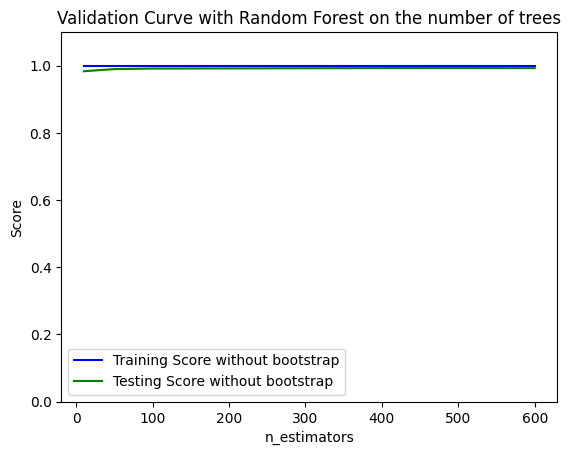

In [18]:
# Validation curve for Random Forest on n_estimators: number of trees in the forest WITH BOOTSTRAP
param_n_estimators_range = [10, 50, 100, 200, 300, 400, 500, 600]
train_scores_RF_wb, test_scores_RF_wb = validation_curve(RandomForestClassifier(bootstrap=False), X_train_scaled, y_train, param_name="n_estimators", param_range=param_n_estimators_range, cv=5) # 5-fold cross validation

train_scores_mean_RF_wb = np.mean(train_scores_RF_wb, axis=1) # mean of the training scores
train_scores_std_RF_wb = np.std(train_scores_RF_wb, axis=1) # standard deviation of the training scores
test_scores_mean_RF_wb = np.mean(test_scores_RF_wb, axis=1) # mean of the test scores
test_scores_std_RF_wb = np.std(test_scores_RF_wb, axis=1) # standard deviation of the test scores

plt.plot(param_n_estimators_range, train_scores_mean_RF_wb,
     label = "Training Score without bootstrap", color = 'b')
plt.plot(param_n_estimators_range, test_scores_mean_RF_wb,
   label = "Testing Score without bootstrap", color = 'g')

plt.title("Validation Curve with Random Forest on the number of trees")
plt.xlabel("n_estimators") 
plt.ylabel("Score") 
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

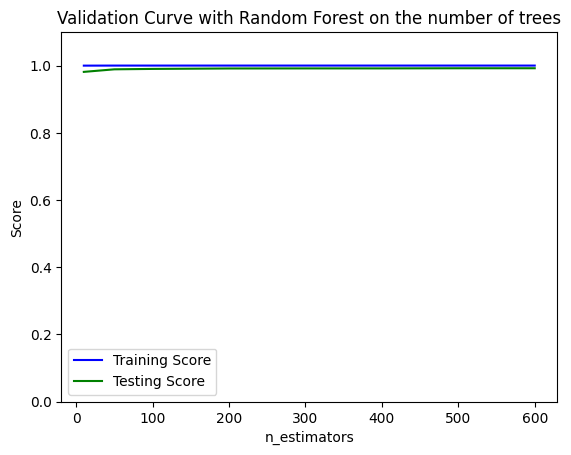

In [19]:
# Validation curve for Random Forest on n_estimators: number of trees in the forest WITH BOOTSTRAP
param_n_estimators_range = [10, 50, 100, 200, 300, 400, 500, 600]
train_scores_RF, test_scores_RF = validation_curve(RandomForestClassifier(), X_train_scaled, y_train, param_name="n_estimators", param_range=param_n_estimators_range, cv=5) # 5-fold cross validation

train_scores_mean_RF = np.mean(train_scores_RF, axis=1) # mean of the training scores
train_scores_std_RF = np.std(train_scores_RF, axis=1) # standard deviation of the training scores
test_scores_mean_RF = np.mean(test_scores_RF, axis=1) # mean of the test scores
test_scores_std_RF = np.std(test_scores_RF, axis=1) # standard deviation of the test scores

plt.plot(param_n_estimators_range, train_scores_mean_RF,
     label = "Training Score", color = 'b')
plt.plot(param_n_estimators_range, test_scores_mean_RF,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Random Forest on the number of trees")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

We can see here on the **validation curve** on different numbers of trees in the forest that we already have a really good score with a relatively low number of trees. Starting at 10 trees we already don't have any underfitting and above 50 trees we see very little improvement in the test score. In theory the number of trees should affect the overfitting but it doesn't seem to be the case here, unless it appears with a very large number of trees that we have not explored. But the absence of overfitting with the increase of the number of trees could potentially happen if the dataset has classes distinctively separated between each other and little to no overfitting seem to occur. 

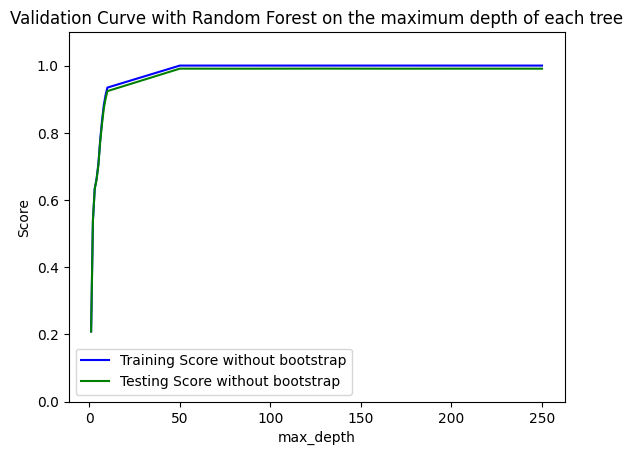

In [20]:
# Validation curve for Random Forest on max_depth: maximum depth of the tree WITHOUT BOOTSTRAP
param_max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 90, 130, 170, 210, 250]
train_scores_RF2_wb, test_scores_RF2_wb = validation_curve(RandomForestClassifier(bootstrap=False), X_train_scaled, y_train, param_name="max_depth", param_range=param_max_depth_range, cv=5) # 5-fold cross validation

train_scores_mean_RF2_wb = np.mean(train_scores_RF2_wb, axis=1) # mean of the training scores
train_scores_std_RF2_wb = np.std(train_scores_RF2_wb, axis=1) # standard deviation of the training scores
test_scores_mean_RF2_wb = np.mean(test_scores_RF2_wb, axis=1) # mean of the test scores
test_scores_std_RF2_wb = np.std(test_scores_RF2_wb, axis=1) # standard deviation of the test scores

plt.plot(param_max_depth_range, train_scores_mean_RF2_wb,
     label = "Training Score without bootstrap", color = 'b')
plt.plot(param_max_depth_range, test_scores_mean_RF2_wb,
   label = "Testing Score without bootstrap", color = 'g')

plt.title("Validation Curve with Random Forest on the maximum depth of each tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

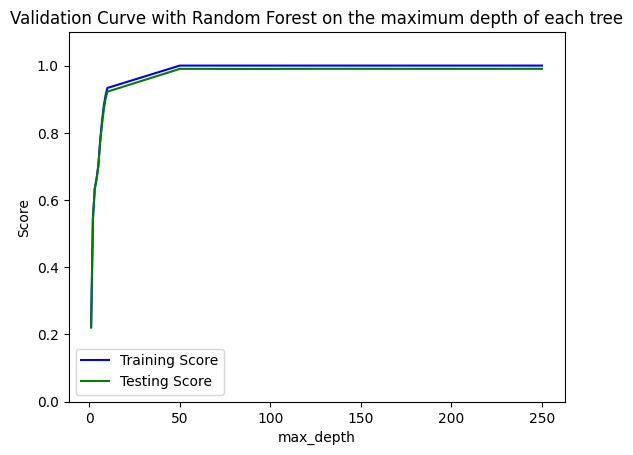

In [21]:
# Validation curve for Random Forest on max_depth: maximum depth of the tree
param_max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 90, 130, 170, 210, 250]
train_scores_RF2, test_scores_RF2 = validation_curve(RandomForestClassifier(), X_train_scaled, y_train, param_name="max_depth", param_range=param_max_depth_range, cv=5) # 5-fold cross validation

train_scores_mean_RF2 = np.mean(train_scores_RF2, axis=1) # mean of the training scores
train_scores_std_RF2 = np.std(train_scores_RF2, axis=1) # standard deviation of the training scores
test_scores_mean_RF2 = np.mean(test_scores_RF2, axis=1) # mean of the test scores
test_scores_std_RF2 = np.std(test_scores_RF2, axis=1) # standard deviation of the test scores

plt.plot(param_max_depth_range, train_scores_mean_RF2,
     label = "Training Score", color = 'b')
plt.plot(param_max_depth_range, test_scores_mean_RF2,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Random Forest on the maximum depth of each tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()


On the **validation curve** on the maximum depth of each tree of the forest we can clearly see some underfitting when the depth is very low. At a depth of around 50 there seem to be little underfitting and the model starts to perform very well. Up to depths of 250 there doesn't seem to be overfitting even though this parameter should lead to overfitting in theory for **Random Forests**. Like explained earlier for the validation curve on the number of trees in the forest, the overfitting could appear with much higher values of depths of trees, and this could be because we have a very clean dataset.

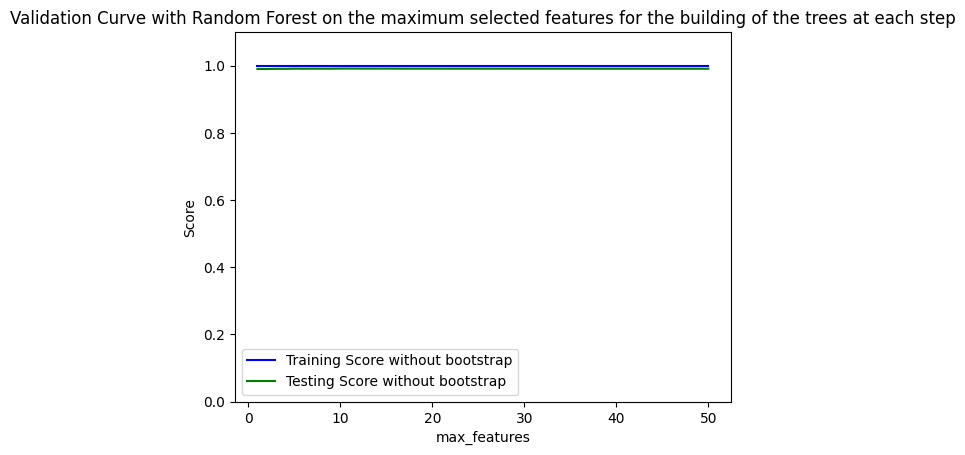

In [22]:
# Validation curve for Random Forest on max_features: selected features for the building of the trees at each step WITHOUT BOOTSTRAP
param_max_features_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 50]
train_scores_RF3_wb, test_scores_RF3_wb = validation_curve(RandomForestClassifier(bootstrap=False), X_train_scaled, y_train, param_name="max_features", param_range=param_max_features_range, cv=5) # 5-fold cross validation

train_scores_mean_RF3_wb = np.mean(train_scores_RF3_wb, axis=1) # mean of the training scores
train_scores_std_RF3_wb = np.std(train_scores_RF3_wb, axis=1) # standard deviation of the training scores
test_scores_mean_RF3_wb = np.mean(test_scores_RF3_wb, axis=1) # mean of the test scores
test_scores_std_RF3_wb = np.std(test_scores_RF3_wb, axis=1) # standard deviation of the test scores

plt.plot(param_max_features_range, train_scores_mean_RF3_wb,
     label = "Training Score without bootstrap", color = 'b')
plt.plot(param_max_features_range, test_scores_mean_RF3_wb,
   label = "Testing Score without bootstrap", color = 'g')

plt.title("Validation Curve with Random Forest on the maximum selected features for the building of the trees at each step")
plt.xlabel("max_features")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

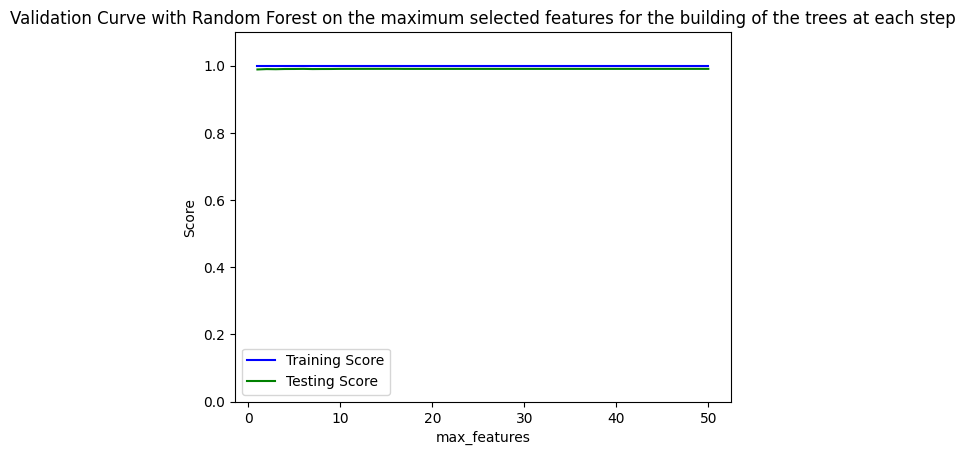

In [23]:
# Validation curve for Random Forest on max_features: selected features for the building of the trees at each step
param_max_features_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 50]
train_scores_RF3, test_scores_RF3 = validation_curve(RandomForestClassifier(), X_train_scaled, y_train, param_name="max_features", param_range=param_max_features_range, cv=5) # 5-fold cross validation

train_scores_mean_RF3 = np.mean(train_scores_RF3, axis=1) # mean of the training scores
train_scores_std_RF3 = np.std(train_scores_RF3, axis=1) # standard deviation of the training scores
test_scores_mean_RF3 = np.mean(test_scores_RF3, axis=1) # mean of the test scores
test_scores_std_RF3 = np.std(test_scores_RF3, axis=1) # standard deviation of the test scores

plt.plot(param_max_features_range, train_scores_mean_RF3,
     label = "Training Score", color = 'b')
plt.plot(param_max_features_range, test_scores_mean_RF3,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Random Forest on the maximum selected features for the building of the trees at each step")
plt.xlabel("max_features")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

We can see that in our case, the number of selected features for building the trees that composed the forest has no impact on underfitting/overfitting. Normally, in theory, this parameter may influence the overfitting. When a random forest overfits, we may play with it to correct that. 

### 3. Discussion about Gini index and Entropy for feature selection

To chose the best feature at each step, we can either select them by their **entropy** or by their **gini index** :

- **Entropy** is a statistical measure that represents the Information Gain and uncertainty. If the entropy is high, the outcome is uncertain, however if the entropy is low the outcome is more certain, in our case we then would chose the feature that provides the most certainty.
</br>Its formula is : $-\sum_{i=1}^{n}{p_i log{2}(p_i)}$ 
</br>where ${p_i}$ the probability of randomly selecting an example in the class ${i}$.
 
- **Gini index** on the other hand represents the *purity* of the data, it represents the probability of correctly classifying a feature if it's value is selected randomly. Its value goes from 0 to 1 with 0 reflecting the most pure data and 1 the most impure. 
</br>Its formula is : $1 - \sum_{i=1}^{j}{P(i)^{2}}$
</br>where ${P(i)}$ is the probability of an element being classified in the class ${i}$.

These two parameters usually show comparable results but the **entropy** usually has a higher complexity. But they are both viable, which is why we evaluate both of them in the hyperparameter tuning phase.

In [24]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
criterion = ['gini', 'entropy']

score_list_train_gini = []
score_list_val_gini = []
execution_time_gini = []

score_list_train_entropy = []
score_list_val_entropy = []
execution_time_entropy = []

for md in max_depth:
    for c in criterion:
        st = time.time()
        model = RandomForestClassifier(max_depth=md, criterion=c)
        model.fit(X_train_splitted_scaled, y_train_splitted)
        et = time.time()
        elapsed_time = et - st
        if c == 'gini':
            score_list_train_gini.append(model.score(X_train_splitted_scaled, y_train_splitted))
            score_list_val_gini.append(model.score(X_val_scaled, y_val))
            execution_time_gini.append(elapsed_time)
        else:
            score_list_train_entropy.append(model.score(X_train_splitted_scaled, y_train_splitted))
            score_list_val_entropy.append(model.score(X_val_scaled, y_val))
            execution_time_entropy.append(elapsed_time)

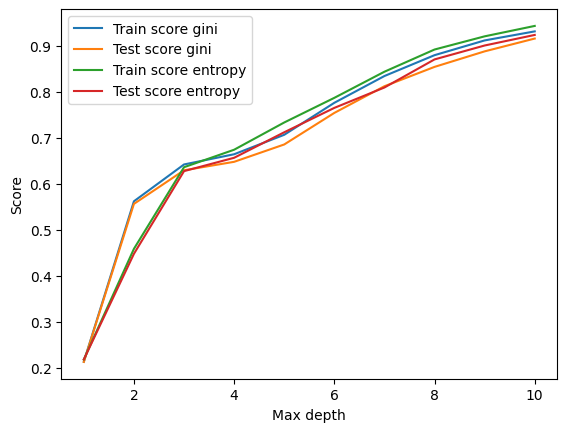

In [25]:
# Max_depth and score according to criterion
plt.plot(max_depth, score_list_train_gini, label='Train score gini')
plt.plot(max_depth, score_list_val_gini, label='Test score gini')
plt.plot(max_depth, score_list_train_entropy, label='Train score entropy')
plt.plot(max_depth, score_list_val_entropy, label='Test score entropy')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend()
plt.show()

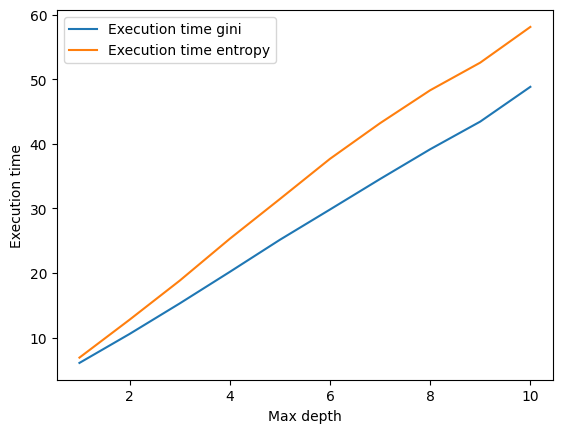

In [26]:
# Max_depth and computation time according to criterion
plt.plot(max_depth, execution_time_gini, label='Execution time gini')
plt.plot(max_depth, execution_time_entropy, label='Execution time entropy')
plt.xlabel('Max depth')
plt.ylabel('Execution time')
plt.legend()
plt.show()

### 4. Automatic hyperparameter tuning

In [27]:
# Automatic hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid_random_forest = {'n_estimators' : [100, 200, 300],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [10, 50, 100, 200, 250, 280]
              }

grid_random_forest = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5) # 5-fold cross validation
grid_random_forest.fit(X_train_scaled, y_train)

print("Best score:", grid_random_forest.best_score_)
print("Param:", grid_random_forest.best_params_)

Best score: 0.9917187500000001
Param: {'criterion': 'gini', 'max_depth': 280, 'n_estimators': 300}


After the hyperparameter tuning phase, our best model uses the **gini index** for the feature evaluation.

[Text(0.7420481637132464, 0.9946808510638298, 'X[33] <= 0.237\ngini = 0.9\nsamples = 100901\nvalue = [16368, 15807, 15841, 16037, 15902, 15979, 16067, 15837\n16232, 15930]'),
 Text(0.579382336456873, 0.9840425531914894, 'X[265] <= 0.268\ngini = 0.873\nsamples = 66553\nvalue = [15358, 3697, 15192, 14894, 15599, 3082, 13238, 4204\n16115, 4446]'),
 Text(0.49637955930312605, 0.973404255319149, 'X[40] <= 0.332\ngini = 0.868\nsamples = 51353\nvalue = [14376, 3573, 13835, 14005, 6037, 3022, 12671, 4061\n5732, 4261]'),
 Text(0.40494076161473597, 0.9627659574468085, 'X[272] <= -0.123\ngini = 0.856\nsamples = 41812\nvalue = [13680, 2738, 13129, 12645, 5787, 2383, 4247, 3205\n5520, 3114]'),
 Text(0.3038384266416125, 0.9521276595744681, 'X[198] <= -0.455\ngini = 0.89\nsamples = 24285\nvalue = [6223, 2580, 4902, 4651, 4800, 2320, 3091, 2994, 4146\n2920]'),
 Text(0.24012858486519217, 0.9414893617021277, 'X[96] <= 1.187\ngini = 0.897\nsamples = 12581\nvalue = [1988, 2208, 2016, 2022, 1519, 2123, 1897

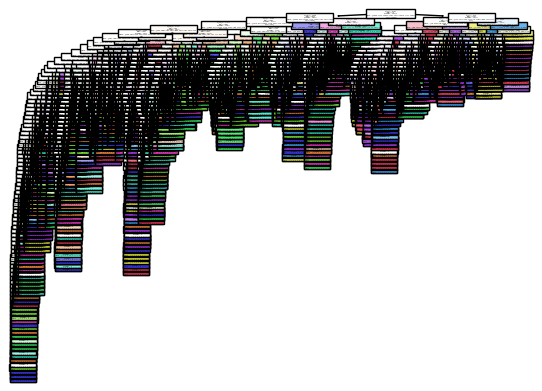

In [28]:
# Best random forest model
best_random_forest = grid_random_forest.best_params_
best_random_forest_model = RandomForestClassifier(n_estimators=best_random_forest['n_estimators'], criterion=best_random_forest['criterion'], max_depth=best_random_forest['max_depth'])
best_random_forest_model.fit(X_train_scaled, y_train)

# print the three first trees of the random forest
from sklearn import tree
tree.plot_tree(best_random_forest_model.estimators_[0], filled=True)

# **Neural network**

### 1. Explanation of the principle behind this model 

**Neural Networks** are a subset of machine learning inspired by the human brain in the way biological **neurons** sends signals between each other. In a Neural Network, each **neuron** or **node** receives one or multiple **inputs**, computes its values and sends it to one or multiple **outputs**. Nodes are arranged in **layers** whose nodes communicates with nodes of other layers with an associated **weigth** and threshold. There are usually an **input layer**, an **output layer** and eventually one or multiple **hidden layers** in between. The network takes data as input and through a **backpropagation algorithm** and then the **weights** of the nodes are adjusted to lower the error with the known output.

<img src="https://github.com/Quintus618/Classification-of-bacteria-among-ten-species-using-supervised-learning-techniques/blob/main/images/neural_network.webp?raw=1" alt="Neural Network example" width="600"/>

*https://www.ibm.com/cloud/learn/neural-networks*

### 2. Discussion about the architecture 

In our case we are facing a classification problem, so the **output layer** of our Neural Network will have a node for each class of bacteria we have to identify, which leaves us with 10 nodes. Each node will return 0 if according to our model the input data does not belong to its class or 1 otherwise, and we should only have one positive output.

Regarding the **input layer** we will have a node for each individual feature of our dataset.

In order to find the correct architecture of our hidden layers we use *hyperparameter tuning*, since the complexity of computation of the Neural Network increases with its number and sizes of layers, we chose to only have 3 hidden layers for this problem and layers sizes between 10 and 100.

Regarding the activation function used in the Neural Network we use either *tanh* or *relu* which are commnly used and advised for classification problems. The one used for the final model will be chosen by the results of the hyperparameter tuning step.

### 3. Validation curve : analysis underfitting/overfitting  

In [7]:
# Validation curve for neural network on number of hidden layers 

param_n_layers = [(10), (10, 10), (10, 10, 10), (10, 10, 10, 10, 10)]
train_scores_NN, test_scores_NN = validation_curve(MLPClassifier(), X_train_scaled, y_train, param_name="hidden_layer_sizes", param_range=param_n_layers, cv=5) # 5-fold cross validation

train_scores_mean_NN = np.mean(train_scores_NN, axis=1) # mean of the training scores
train_scores_std_NN = np.std(train_scores_NN, axis=1) # standard deviation of the training scores
test_scores_mean_NN = np.mean(test_scores_NN, axis=1) # mean of the test scores
test_scores_std_NN = np.std(test_scores_NN, axis=1) # standard deviation of the test scores

c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


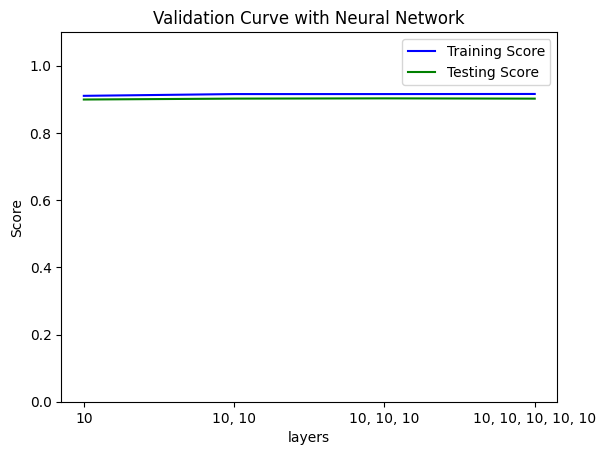

In [ ]:
param_label = []
for element in param_n_layers:
    if type(element) is tuple:
        tup_string = ', '.join([str(value) for value in element])
    else:
        tup_string = str(value)
    param_label.append(tup_string)

# Plotting of validation curve for neural network on number of hidden layers 
plt.plot(param_label, train_scores_mean_NN,
     label = "Training Score", color = 'b')
plt.plot(param_label, test_scores_mean_NN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Neural Network")
plt.xlabel("layers")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

In [ ]:
# Validation curve for neural network on size of hidden layers 

param_layers_sizes = [(10), (30), (50), (70), (90)]
train_scores_NN, test_scores_NN = validation_curve(MLPClassifier(), X_train_scaled, y_train, param_name="hidden_layer_sizes", param_range=param_layers_sizes, cv=5) # 5-fold cross validation

train_scores_mean_NN = np.mean(train_scores_NN, axis=1) # mean of the training scores
train_scores_std_NN = np.std(train_scores_NN, axis=1) # standard deviation of the training scores
test_scores_mean_NN = np.mean(test_scores_NN, axis=1) # mean of the test scores
test_scores_std_NN = np.std(test_scores_NN, axis=1) # standard deviation of the test scores

c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

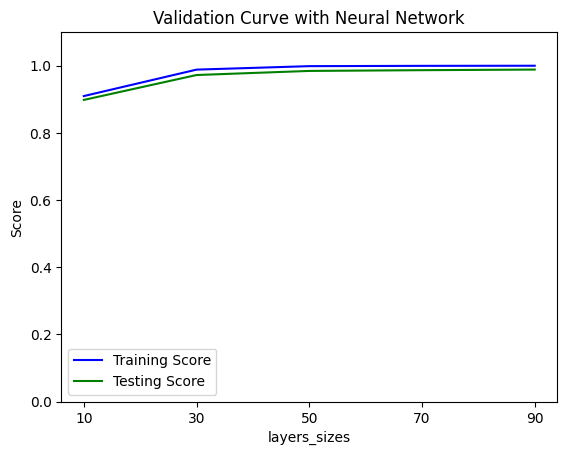

In [ ]:
param_label = []
for element in param_layers_sizes:
    if type(element) is tuple:
        tup_string = ', '.join([str(value) for value in element])
    else:
        tup_string = str(element)
    param_label.append(tup_string)

# Plotting of validation curve for neural network on size of hidden layers 
plt.plot(param_label, train_scores_mean_NN,
     label = "Training Score", color = 'b')
plt.plot(param_label, test_scores_mean_NN,
   label = "Testing Score", color = 'g')

plt.title("Validation Curve with Neural Network")
plt.xlabel("layers_sizes")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.legend(loc="best")
plt.show()

### 4. Automatic hyper parameter tuning with GridSearchCV

In [ ]:
param_grid_neural_network = {
    'hidden_layer_sizes': [(10, 10, 10), (50, 30, 10), (60, 40, 20), (100, 60, 20)],
    'activation': ['tahn', 'relu'],
    'solver': ['sgd'],
    'max_iter': [2000],
    'early_stopping': [True],
    'n_iter_no_change': [10],
    'shuffle': [True],
    'alpha': [1e-4, 1e-3],
    'learning_rate_init': [1e-3, 1e-2]
}

grid_neural_network = GridSearchCV(MLPClassifier(), param_grid_neural_network, cv=5)
grid_neural_network.fit(X_train_scaled, y_train)

print("Best score:", grid_neural_network.best_score_)
print("Param:", grid_neural_network.best_params_)

c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\momop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\momop\AppData\Local\Programs\Python\P

Best score: 0.985675
Param: {'activation': 'relu', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100, 60, 20), 'learning_rate_init': 0.01, 'max_iter': 2000, 'n_iter_no_change': 10, 'shuffle': True, 'solver': 'sgd'}


For the hyperparameter tuning, we chose multiple layers sizes, activation functions and different values of alpha and initial learning rate. We then had the best results with the largest layer sizes and de *relu* activation function, with a score of around 98.6%

In [ ]:
# Best neural network model
best_neural_network_params = grid_neural_network.best_params_
best_neural_network_model = MLPClassifier(
    hidden_layer_sizes=best_neural_network_params['hidden_layer_sizes'],
    activation=best_neural_network_params['activation'],
    solver=best_neural_network_params['solver'],
    max_iter=best_neural_network_params['max_iter'],
    early_stopping=best_neural_network_params['early_stopping'],
    n_iter_no_change=best_neural_network_params['n_iter_no_change'],
    shuffle=best_neural_network_params['shuffle'],
    alpha=best_neural_network_params['alpha'],
    learning_rate_init=best_neural_network_params['learning_rate_init']
)
best_neural_network_model.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(100, 60, 20), learning_rate_init=0.01,
              max_iter=2000, solver='sgd')

# Result comparison

### 1. Confusion Matrices

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_KNN = best_KNN_model.predict(X_test_scaled)
y_pred_RF = best_random_forest_model.predict(X_test_scaled)
y_pred_NN = best_neural_network_model.predict(X_test_scaled)

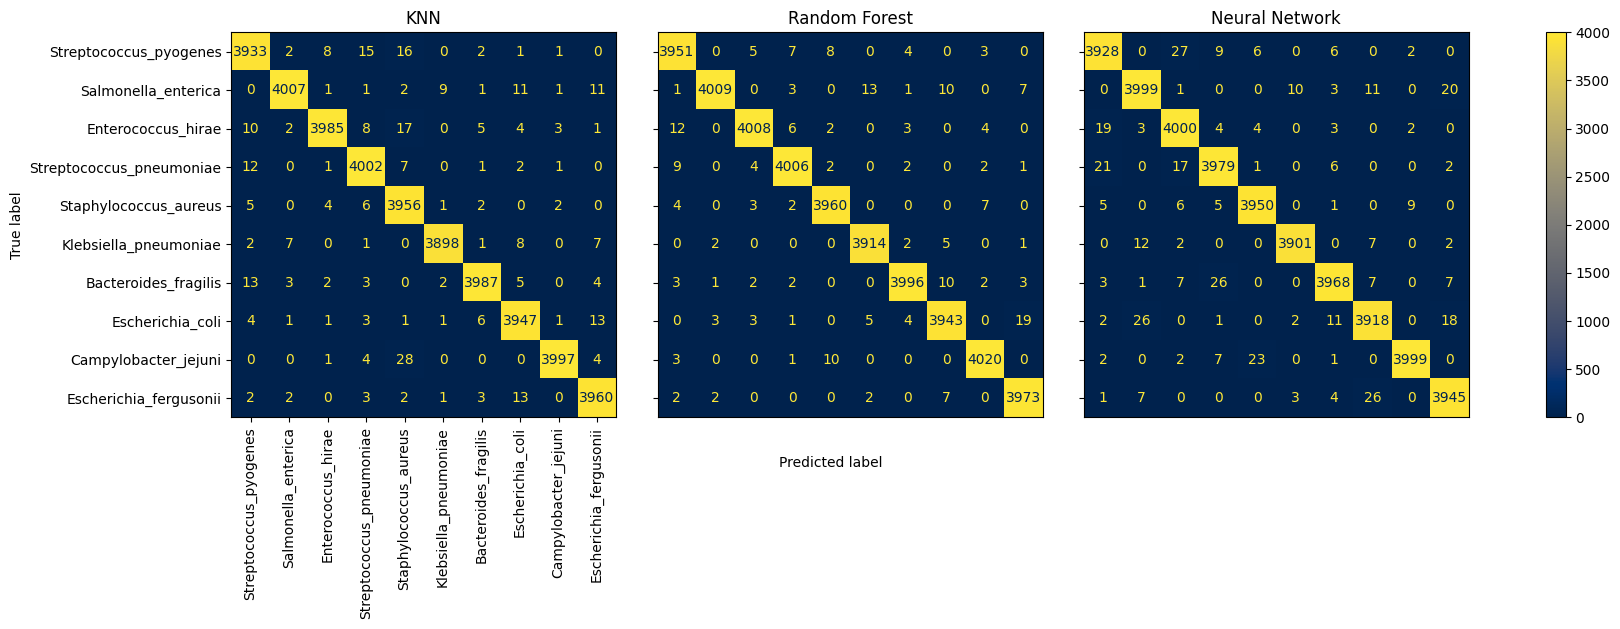

In [ ]:
confusion_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
confusion_matrix_NN = confusion_matrix(y_test, y_pred_NN)

fig, axs = plt.subplots(1, 3, sharey='row', figsize=(20, 5))

cm1 = ConfusionMatrixDisplay(confusion_matrix_KNN, display_labels=bacteria_names)
cm1.plot(xticks_rotation='vertical', cmap='cividis', ax=axs[0], include_values=True)
cm1.ax_.set_title("KNN")
cm1.ax_.set_xlabel('')
cm1.im_.colorbar.remove()

cm2 = ConfusionMatrixDisplay(confusion_matrix_RF, display_labels=bacteria_names)
cm2.plot(xticks_rotation='vertical', cmap='cividis', ax=axs[1], include_values=True)
cm2.ax_.set_title("Random Forest")
cm2.ax_.set_ylabel('')
cm2.ax_.set_xlabel('')
cm2.ax_.set_xticks([])
cm2.im_.colorbar.remove()

cm3 = ConfusionMatrixDisplay(confusion_matrix_NN, display_labels=bacteria_names)
cm3.plot(xticks_rotation='vertical', cmap='cividis', ax=axs[2], include_values=True)
cm3.ax_.set_title("Neural Network")
cm3.ax_.set_ylabel('')
cm3.ax_.set_xlabel('')
cm3.ax_.set_xticks([])
cm3.im_.colorbar.remove()

fig.text(0.4, 0.01, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.1, hspace=0.1)

fig.colorbar(cm.im_, ax=axs)

We have here the **confusion matrices** of the three models we trained, and as we can se all three of have very few missclassification and most of the bacterias are correctly classified (the True and Predicted labels show the same values for most of the bacterias).

### 2. Precision and Accuracy

**Accuracy** and **Precision** are two very important metrics used to evaluate a Machine Learning system, there are of course other metrics but these one are the most relevant and most used.

- **Accuracy** takes into account True and False negatives and positives, all of these results are taken into account to show how a model performed. It is computed with the formula :\
$\frac{TP + TN}{TP + TN + FP + FN}$

- **Precision** takes only into account True and False positive rates, not the negative ones, and is computed with the formula:\
$\frac{TP}{TP + FP}$

We must have the highest possible accuracy of results with both very low rates of false positives and false negatives in order to not miss classify a bacteria, which could lead to misstreatment of a patient.

In [ ]:
# Precision and accuracy for KNN
from sklearn.metrics import precision_score, accuracy_score

precision_KNN = precision_score(y_test, y_pred_KNN, average='weighted')
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

print("Precision for KNN:", precision_KNN)
print("Accuracy for KNN:", accuracy_KNN)

# Precision and accuracy for Random Forest

precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
accuracy_RF = accuracy_score(y_test, y_pred_RF)

print("Precision for Random Forest:", precision_RF)
print("Accuracy for Random Forest:", accuracy_RF)

# Precision and accuracy for Neural Network

precision_NN = precision_score(y_test, y_pred_NN, average='weighted')
accuracy_NN = accuracy_score(y_test, y_pred_NN)

print("Precision for Neural Network:", precision_NN)
print("Accuracy for Neural Network:", accuracy_NN)

Precision for KNN: 0.9918276352672126
Accuracy for KNN: 0.9918
Precision for Random Forest: 0.9945040938017526
Accuracy for Random Forest: 0.9945
Precision for Neural Network: 0.9896843480097656
Accuracy for Neural Network: 0.989675


We see that the **Random Forest** provides the best results both in terms of Precision and Accuracy, followed by the **KNN** which has very close results, The **Neural Network** seems to show slightly lower performances than the other two models but this could be further improved by increasing the number and sizes of the layers, but that would require much more time and computational power.

We can see that for all the 3 models classifies very well each class, with no class more well classified than the others (aroud 4000 qualifications for each classes on each model) and little to no missclassification, and since the **Precision** is also very high we can conclude that the **Bias** on all 3 models is very low, which indicates that the models all perform really well.

Since here the performances cannot really determine which model we should use other metrics and characteristics, we should rely on other characteristics to find one that best fits our problem.

### 3. Complexity of each model and time computation

In [ ]:
import time
    
models = []

best_KNN_model = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=1)
best_random_forest_model = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=200)
best_neural_network_model = MLPClassifier(
    hidden_layer_sizes=(100, 60, 20),
    activation='relu',
    solver='sgd',
    max_iter=2000,
    early_stopping=True,
    n_iter_no_change=10,
    shuffle=True,
    alpha=0.001,
    learning_rate_init=0.01
)

models = []
models.append(best_KNN_model)
models.append(best_random_forest_model)
models.append(best_neural_network_model)

times = []

for model in models:
    st = time.time()

    model.fit(X_train_scaled, y_train)

    model.score(X_val_scaled, y_val)

    et = time.time()

    elapsed_time = et - st

    times.append(elapsed_time)

print("KNN: ", times[0])
print("Random Forest: ", times[1])
print("Neural Network: ", times[2])

KNN:  93.23312401771545
Random Forest:  271.7699921131134
Neural Network:  87.99700164794922


# Interpretability Discussion
1) Complexity and score tradeoff 
2) Interpretability of each model 
3) Conclusion 

Explanation of the difference between explanability and interpretability

**Interpretability:** It is the degree to which you can foresee what will happen when the input or algorithmic parameters are changed.

**Explainability:**  It is the level of human explanation of a machine learning system's internal workings.

Generally, simple models are not really effective to solve complex problems with a great score. However, their execution time are very low and they are often more explanable and interpretable than complex models. The aim of a machine learning engineer is to select a model, the simplest as possible that gives the best results. According to specific fields, like medecine, explainability and interpretability can be important to be considered.

KNN is a very simple supervised learning model. Its main advantage is it is easily comprehensible for humans, so it is more explanable than other ML models. With this model, we can easily understand the impact of a change on features or inputs and thus, predict the output because the different step of KNN like distance computation, sorting distances, are straightforward. We don't say that KNN is the key of knowledges and by using it, we can perfectly predict outputs. An example is the choice of K to avoid underfitting/overfitting. To attribute a good value, it is necessary to test with the dataset. However, it is rarely the best model in terms of score. Thus, the majority of companies prefers using more accurate models than it but certain specific area like Medecine, may find it interesting. For our case, its good interpretability is needed concerning the nature of the problem and it gives a pretty good score, 99%. We can conclude that it is a good solution. The decision boundary formed by KNN is simple and easy to understand as it is based on the distance between the data points.

Random Forest is another supervised learning model that may be understandable for humans because it is composed of several Decision Trees. The principle behind decision trees is very similar to ours. We are more familiar with this logic to choose. The randomness of the creation of bootstrapped datasets and of the choice of features to build the trees makes its interpretability more difficult. However, as its decision is based on the majority of the output of each decision tree, we are able to do predictions. In our case, our random forest has the best score, 99% and it has a quite good interpretability as we discussed. Thus, it seems to be a good compromsise for having a good score with a correct interpretability and explanability. However, interpretability and explainability of this model are worse than that of the KNN. Random Forest is also a relatively interpretable model as it is based on the concept of building multiple decision trees and aggregating their predictions. While individual decision trees can be difficult to interpret, the overall prediction made by a random forest can be understood by analyzing the contribution of each tree to the final prediction.

Neural networks are very complex models in machine learning. They are black boxes. They give excellent results and they are really robust against noises but its operation is opaque. We don't know how the neural network interprets data and calibrates its weights. Nowadays, lots of reasearch try to improve interpretability and explanability of neural networks. We can say that explanability and interpretability criteria are low. For our problem, a low interpretability is problematic in spite of its good score of 98% of accuracy. Also, despite its high score, it is quite demanding in terms of resources and computational power to train. Neural networks, on the other hand, are complex models that consist of multiple layers of interconnected nodes. These nodes perform mathematical operations on the input data and pass the result through the network to make a prediction. The internal workings of a neural network can be difficult to interpret, as the mathematical operations performed by the nodes are often complex and abstract.

# Conclusion

We found that the best compromise between the **best score**, **computational time** and **explainibility/interpretability** are the KNN and the Random Forest algorithms. These two models have similar scores but KNN is faster. Thus, we have chosen to solve the problem of multi-classification by using our KNN model.

Nevertheless, we think that KNN model is the best trade-off between score, computational time and explainability/interpretability because we work with a particularly clean dataset. We expected to have the best results with models more complex like random forest.

This project has been the occasion of working on a new kind of Machine Learning problem, Multi-classification problems, and new kind of data, medical data. To solve it, we have implemented new Machine Learning models, KNN, Random Forest and Neural Network. Due to the nature of the problem domain, we had to deepen the notions of explicability and interpretability of the models in order to choose the one that best suits the context. We have therefore tried to answer with the eyes of the Machine Learning specialist but also with those of the scientists.